In [1]:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                import numpy as np
import matplotlib.pyplot as mtp
import pandas as pd
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
%matplotlib inline

df=pd.read_csv('evdataset.csv')
df.head()


,id,Make,link,City - Cold Weather,Highway - Cold Weather,Combined - Cold Weather,City - Mild Weather,Highway - Mild Weather,Combined - Mild Weather,Acceleration 0 - 100 km/h,...,Charge Speed,Fastcharge Speed,Length,Width,Height,Wheelbase,Gross Vehicle Weight (GVWR),Max. Payload,Cargo Volume,Seats
0,1647,Genesis,https://ev-database.org/car/1647/Genesis-GV60-...,390,275,330,575,355,445,7.8,...,49,1020,4515,1890,1580,2900,2495,595,432,5
1,1493,Mercedes,https://ev-database.org/car/1493/Mercedes-EQB-...,330,235,280,480,300,375,6.2,...,46,470,4684,1834,1701,2829,2580,480,495,7
2,1229,Porsche,https://ev-database.org/car/1229/Porsche-Tayca...,400,305,350,580,385,470,3.2,...,46,1020,4963,1966,1381,2900,2880,575,366,4
3,1252,BMW,https://ev-database.org/car/1252/BMW-i4-eDrive40,445,340,390,670,440,540,5.7,...,54,730,4783,1852,1448,2856,2605,555,470,5
4,1534,Volkswagen,https://ev-database.org/car/1534/Volkswagen-ID...,440,320,380,660,415,520,7.9,...,55,570,4261,1809,1568,2771,2300,447,385,5


In [2]:
df.shape

(194, 27)

In [6]:
df.dtypes

id                               int64
Make                            object
link                            object
City - Cold Weather              int64
Highway - Cold Weather           int64
Combined - Cold Weather          int64
City - Mild Weather              int64
Highway - Mild Weather           int64
Combined - Mild Weather          int64
Acceleration 0 - 100 km/h      float64
Top Speed                        int64
Electric Range                   int64
Total Power                      int64
Total Torque                     int64
Drive                           object
Battery Capacity               float64
Charge Power                   float64
Charge Speed                     int64
Fastcharge Speed                 int64
Length                           int64
Width                            int64
Height                           int64
Wheelbase                        int64
Gross Vehicle Weight (GVWR)      int64
Max. Payload                     int64
Cargo Volume             

In [3]:
df.columns


Index(['id', 'Make', 'link', 'City - Cold Weather', 'Highway - Cold Weather',
       'Combined - Cold Weather', 'City - Mild Weather',
       'Highway - Mild Weather', 'Combined - Mild Weather',
       'Acceleration 0 - 100 km/h', 'Top Speed', 'Electric Range',
       'Total Power', 'Total Torque', 'Drive', 'Battery Capacity',
       'Charge Power', 'Charge Speed', 'Fastcharge Speed', 'Length', 'Width',
       'Height', 'Wheelbase', 'Gross Vehicle Weight (GVWR)', 'Max. Payload',
       'Cargo Volume', 'Seats'],
      dtype='object')

In [22]:
df.isnull().sum()

id                             0
Make                           0
link                           0
City - Cold Weather            0
Highway - Cold Weather         0
Combined - Cold Weather        0
City - Mild Weather            0
Highway - Mild Weather         0
Combined - Mild Weather        0
Acceleration 0 - 100 km/h      0
Top Speed                      0
Electric Range                 0
Total Power                    0
Total Torque                   0
Drive                          0
Battery Capacity               0
Charge Power                   0
Charge Speed                   0
Fastcharge Speed               0
Length                         0
Width                          0
Height                         0
Wheelbase                      0
Gross Vehicle Weight (GVWR)    0
Max. Payload                   0
Cargo Volume                   0
Seats                          0
dtype: int64

In [23]:
df=df.drop(['id','Make','link'],axis=1)
df

,City - Cold Weather,Highway - Cold Weather,Combined - Cold Weather,City - Mild Weather,Highway - Mild Weather,Combined - Mild Weather,Acceleration 0 - 100 km/h,Top Speed,Electric Range,Total Power,...,Charge Speed,Fastcharge Speed,Length,Width,Height,Wheelbase,Gross Vehicle Weight (GVWR),Max. Payload,Cargo Volume,Seats
0,390,275,330,575,355,445,7.8,185,390,168,...,49,1020,4515,1890,1580,2900,2495,595,432,5
1,330,235,280,480,300,375,6.2,160,330,215,...,46,470,4684,1834,1701,2829,2580,480,495,7
2,400,305,350,580,385,470,3.2,260,415,500,...,46,1020,4963,1966,1381,2900,2880,575,366,4
3,445,340,390,670,440,540,5.7,190,470,250,...,54,730,4783,1852,1448,2856,2605,555,470,5
4,440,320,380,660,415,520,7.9,160,450,150,...,55,570,4261,1809,1568,2771,2300,447,385,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,390,290,340,560,370,450,2.8,260,400,560,...,45,980,4963,1966,1378,2900,2870,575,366,4
190,440,320,380,660,415,515,7.9,160,450,150,...,55,570,4261,1809,1568,2771,2280,420,385,4
191,210,140,170,295,170,220,11.7,135,195,100,...,27,310,4753,1921,1849,2975,2440,639,806,7
192,395,290,340,580,370,460,6.2,180,400,220,...,49,500,4588,1865,1614,2764,2715,575,535,5


In [24]:
x=df.drop(['Electric Range'],axis=1)
y=df['Electric Range']

In [25]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
x['Drive']=label.fit_transform(x['Drive'])

In [26]:
x.shape

(194, 23)

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [28]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

# Linear Regression

In [29]:
from sklearn.linear_model import LinearRegression
regress=LinearRegression()
regress.fit(x_train,y_train)

LinearRegression()

In [30]:
pred1=regress.predict(x_test)
pred1

array([436.02568735, 199.7197725 , 640.73365225, 284.20367628,
       606.64277355, 374.09917044, 453.87459722, 391.01881428,
       447.49694618, 409.77191348, 354.36387419, 477.91115616,
       329.40524097, 404.51867788, 346.09756253, 408.67251008,
       284.05000691, 381.57463284, 196.5728221 , 194.09119423,
       259.22316712, 348.77841794, 260.08368998, 178.27904702,
       178.66535882, 316.36170278, 352.74177232, 485.20591522,
       378.74159302, 231.32820227, 382.64500907, 335.07253201,
       338.69333592, 370.5882078 , 233.33914415, 265.21479689,
       425.40119123, 377.53445536, 226.76629465])

In [31]:
y_test

138    435
16     200
155    640
96     285
68     605
153    375
55     455
15     390
112    450
111    410
184    355
18     480
82     330
9      405
164    345
117    410
69     285
113    380
191    195
119    195
123    260
144    350
66     260
45     180
158    180
115    315
67     355
93     485
30     380
101    230
118    385
75     335
24     340
172    370
127    235
169    265
19     425
168    380
73     225
Name: Electric Range, dtype: int64

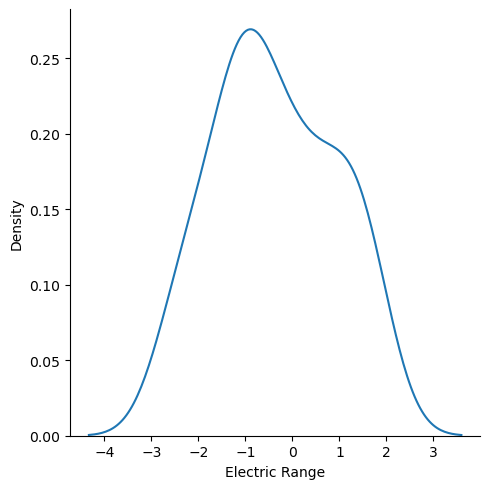

In [32]:
sns.displot(pred1-y_test,kind='kde')

In [33]:
print("Train Score:",regress.score(x_train,y_train))
print("Test Score:",regress.score(x_test,y_test))

Train Score: 0.9997935936764151
Test Score: 0.9998491956765889


In [34]:
mae = mean_absolute_error(y_test,pred1)
mae

1.12483180640287

In [35]:
r2 = r2_score(y_test,pred1)
r2

0.9998491956765889

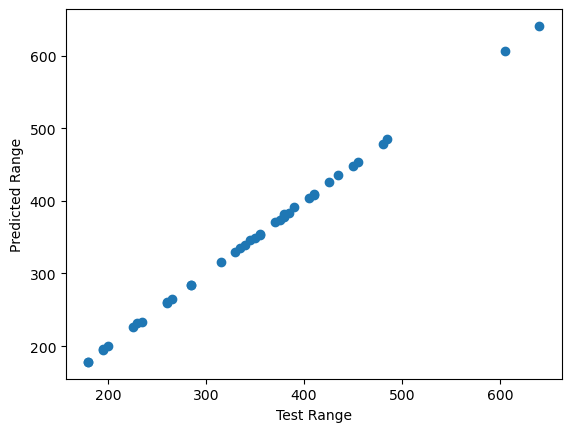

In [36]:
mtp.scatter(y_test,pred1)
mtp.xlabel("Test Range")
mtp.ylabel("Predicted Range")
mtp.show()

# Logestic Regression


In [37]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [38]:
pred2=lr.predict(x_test)

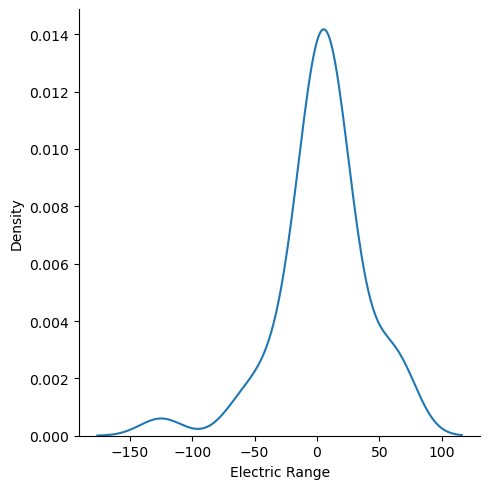

In [39]:
sns.displot(pred2-y_test,kind='kde')

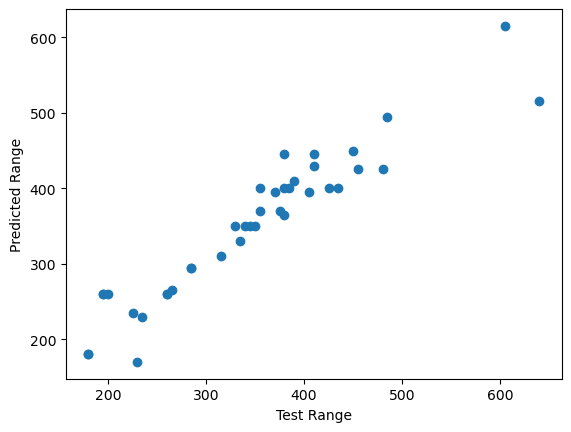

In [40]:
mtp.scatter(y_test,pred2)
mtp.xlabel("Test Range")
mtp.ylabel("Predicted Range")
mtp.show()

In [41]:
score=accuracy_score(pred2,y_test)
score

0.1794871794871795

In [42]:
mae = mean_absolute_error(y_test,pred2)
mae

23.333333333333332

In [43]:
r2 = r2_score(y_test,pred2)
r2

0.8904092436534329

# Ridge Regression

In [44]:
from sklearn.linear_model import Ridge

In [45]:
ridge_regress=Ridge()

In [46]:
ridge_regress.fit(x_train,y_train)

Ridge()

In [47]:
pred3=ridge_regress.predict(x_test)

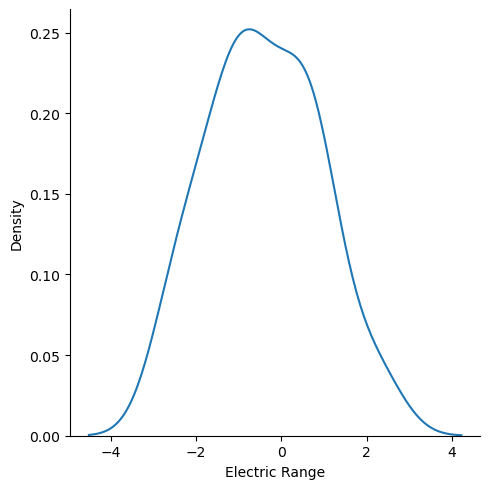

In [48]:
sns.displot(pred3-y_test,kind='kde')

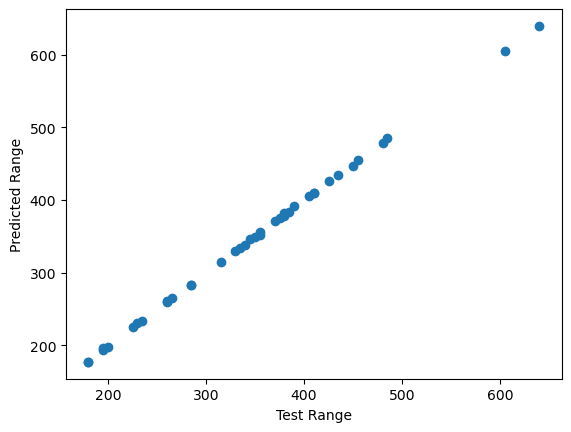

In [49]:
mtp.scatter(y_test,pred3)
mtp.xlabel("Test Range")
mtp.ylabel("Predicted Range")
mtp.show()

In [50]:
print("Train Score:",ridge_regress.score(x_train,y_train))
print("Test Score:",ridge_regress.score(x_test,y_test))

Train Score: 0.9997690772267609
Test Score: 0.9998383699571961


In [51]:
mae = mean_absolute_error(y_test,pred3)
mae

1.133592641276599

In [52]:
r2 = r2_score(y_test,pred3)
r2

0.9998383699571961

# Lasso regression

In [53]:
from sklearn.linear_model import Lasso

In [54]:
lasso=Lasso()
lasso.fit(x_train,y_train)

Lasso()

In [55]:
pred4=lasso.predict(x_test)

In [56]:

print("Train Score:",lasso.score(x_train,y_train))
print("Test Score:",lasso.score(x_test,y_test))

Train Score: 0.999581324288991
Test Score: 0.9997246116150882


In [57]:
mae = mean_absolute_error(y_test,pred4)
mae

1.4314832780251352

In [58]:
r2 = r2_score(y_test,pred4)
r2

0.9997246116150882

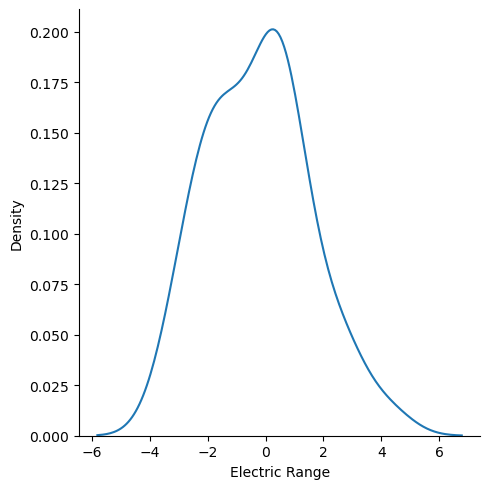

In [59]:
sns.displot(pred4-y_test,kind='kde')

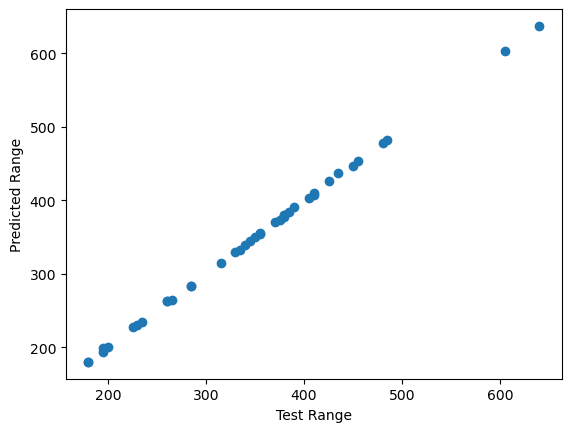

In [60]:
mtp.scatter(y_test,pred4)
mtp.xlabel("Test Range")
mtp.ylabel("Predicted Range")
mtp.show()

# RandomForestRegressor


In [61]:
from sklearn.ensemble import RandomForestRegressor

forest_reg=RandomForestRegressor(n_estimators=100,random_state=42)
forest_reg.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

In [62]:
pred5=forest_reg.predict(x_test)

In [63]:
print("Train Score:",forest_reg.score(x_train,y_train))
print("Test Score:",forest_reg.score(x_test,y_test))

Train Score: 0.9994657721976004
Test Score: 0.9949936614407101


In [64]:
mae = mean_absolute_error(y_test,pred5)
mae

3.2833333333333328

In [65]:
r2 = r2_score(y_test,pred5)
r2

0.9949936614407101

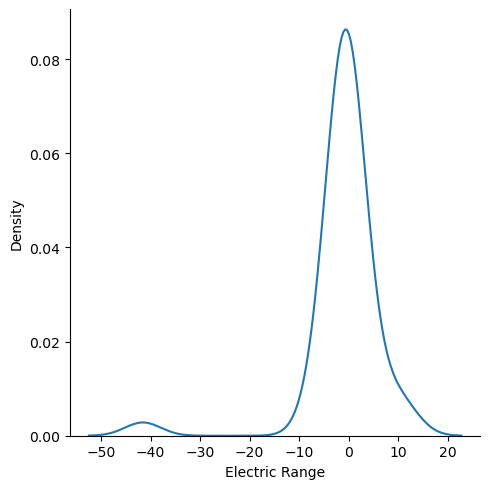

In [66]:
sns.displot(pred5-y_test,kind='kde')

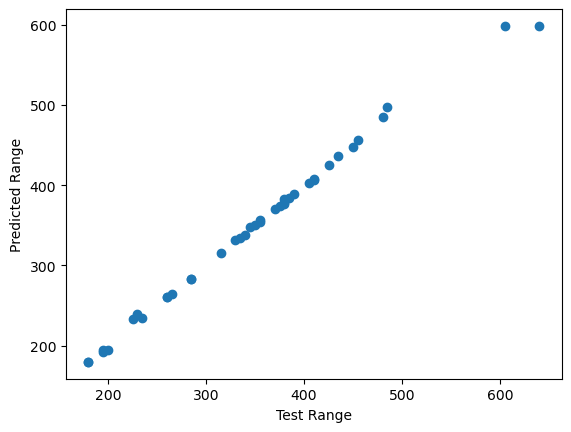

In [67]:
mtp.scatter(y_test,pred5)
mtp.xlabel("Test Range")
mtp.ylabel("Predicted Range")
mtp.show()

# Decision Tree

In [68]:
from sklearn import tree
classifier=tree.DecisionTreeClassifier()
classifier.fit(x_train,y_train)

DecisionTreeClassifier()

In [69]:
pred6=classifier.predict(x_test) 

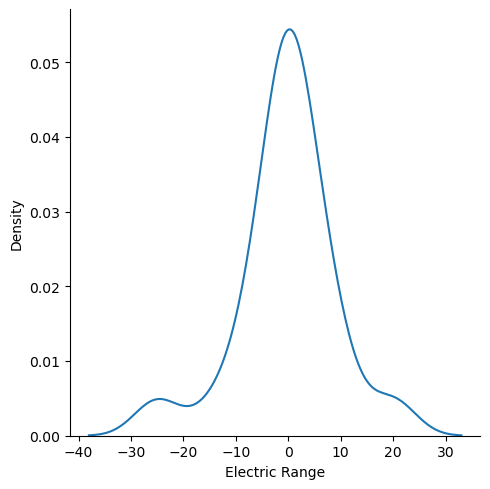

In [70]:
sns.displot(pred6-y_test,kind='kde')

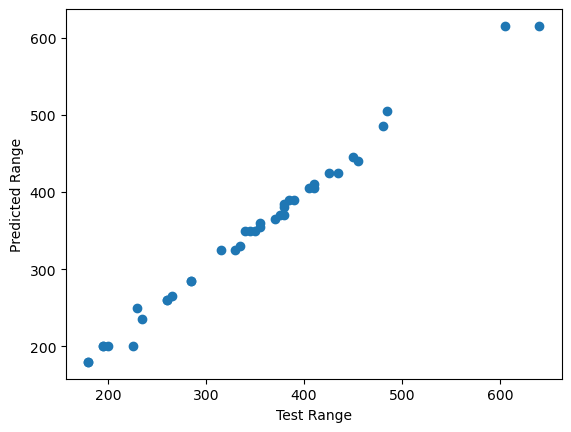

In [71]:
mtp.scatter(y_test,pred6)
mtp.xlabel("Test Range")
mtp.ylabel("Predicted Range")
mtp.show()

In [72]:
score=accuracy_score(pred6,y_test)
score

0.41025641025641024

In [73]:
mae = mean_absolute_error(y_test,pred6)
mae

5.641025641025641

In [74]:
r2 = r2_score(y_test,pred6)
r2

0.9929589358616714

# KNeighbours

In [75]:
from sklearn.neighbors import KNeighborsClassifier
classifier2=KNeighborsClassifier()
classifier2.fit(x_train,y_train)

KNeighborsClassifier()

In [76]:
pred7=classifier2.predict(x_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


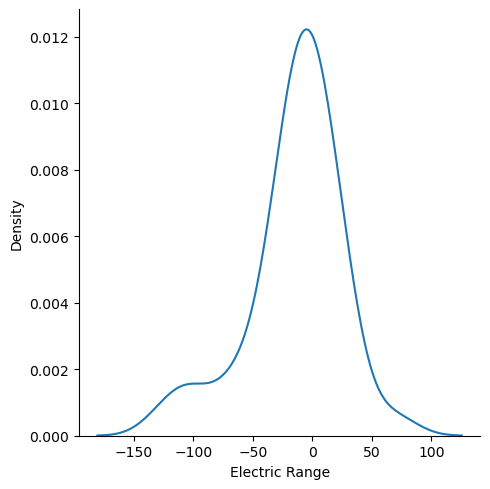

In [77]:
sns.displot(pred7-y_test,kind='kde')

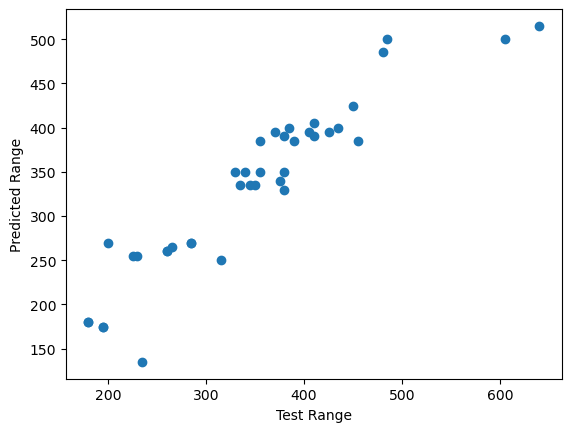

In [78]:
mtp.scatter(y_test,pred7)
mtp.xlabel("Test Range")
mtp.ylabel("Predicted Range")
mtp.show()

In [79]:
score=accuracy_score(pred7,y_test)
score

0.15384615384615385

In [80]:
mae = mean_absolute_error(y_test,pred7)
mae

27.307692307692307

In [81]:
r2 = r2_score(y_test,pred7)
r2

0.8538979191296803

# SVM

In [82]:
from sklearn.svm import SVC 
classifier3 = SVC(kernel='linear', random_state=0)
classifier3.fit(x_train, y_train)

SVC(kernel='linear', random_state=0)

In [83]:
pred8=classifier3.predict(x_test)

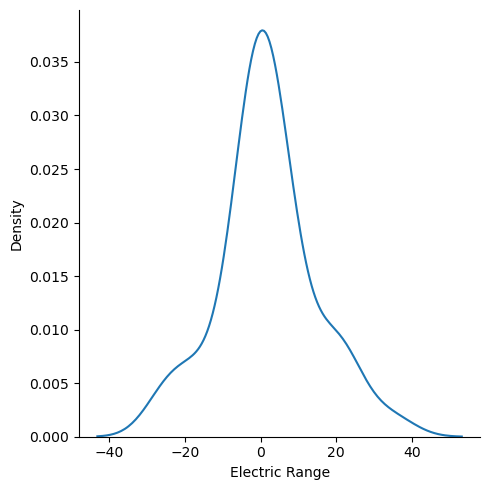

In [84]:
sns.displot(pred8-y_test,kind='kde')

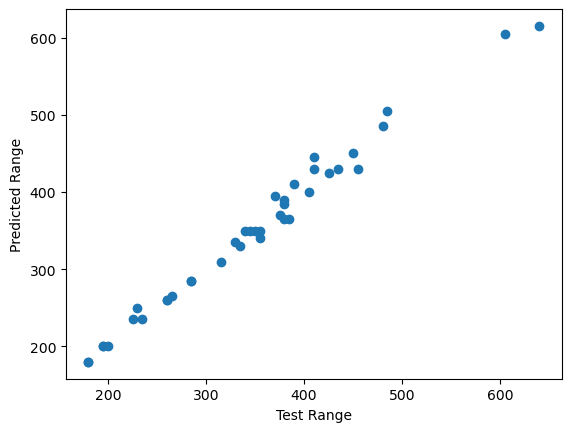

In [85]:
mtp.scatter(y_test,pred8)
mtp.xlabel("Test Range")
mtp.ylabel("Predicted Range")
mtp.show()

In [86]:
score=accuracy_score(pred8,y_test)
score

0.3333333333333333

In [87]:
mae = mean_absolute_error(y_test,pred8)
mae

8.461538461538462

In [88]:
r2 = r2_score(y_test,pred8)
r2

0.9860314372739609

# Random Forest Classifier


In [89]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [90]:
pred9=rf.predict(x_test)

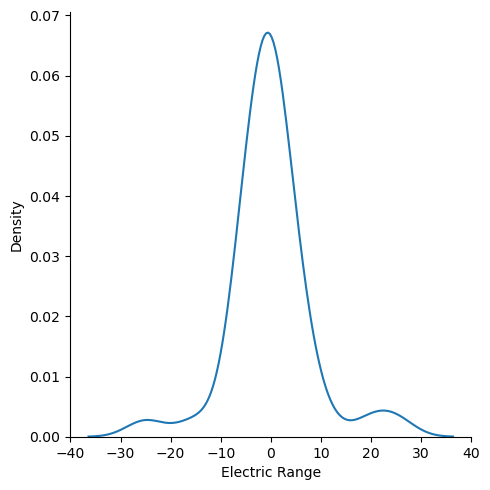

In [91]:
sns.displot(pred9-y_test,kind='kde')

In [92]:
score=accuracy_score(pred9,y_test)
score

0.46153846153846156

In [93]:
mae = mean_absolute_error(y_test,pred9)
mae

4.487179487179487

In [94]:
r2 = r2_score(y_test,pred9)
r2

0.9946056363456353

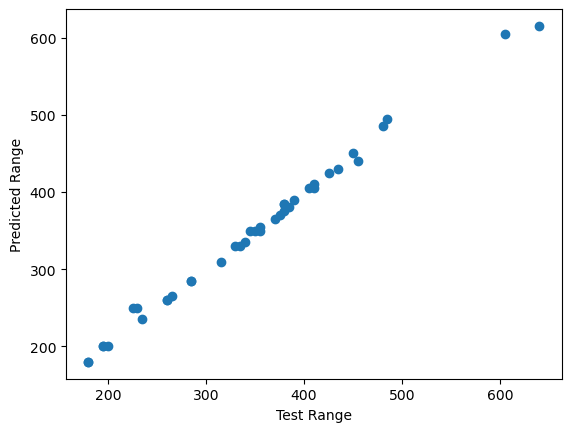

In [95]:
mtp.scatter(y_test,pred9)
mtp.xlabel("Test Range")
mtp.ylabel("Predicted Range")
mtp.show()

# Bayes

In [96]:
from sklearn.naive_bayes import GaussianNB
bayes = GaussianNB()
bayes.fit(x_train, y_train)

GaussianNB()

In [97]:
pred10=bayes.predict(x_test)

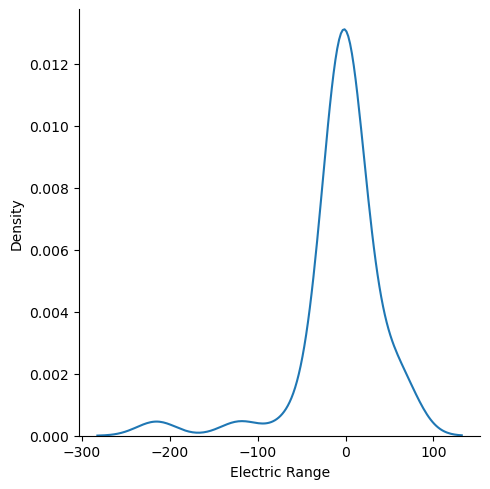

In [98]:
sns.displot(pred10-y_test,kind='kde')

In [99]:
score=accuracy_score(pred10,y_test)
score

0.3076923076923077

In [100]:
mae = mean_absolute_error(y_test,pred10)
mae

22.564102564102566

In [101]:
r2 = r2_score(y_test,pred10)
r2

0.8100048338157443

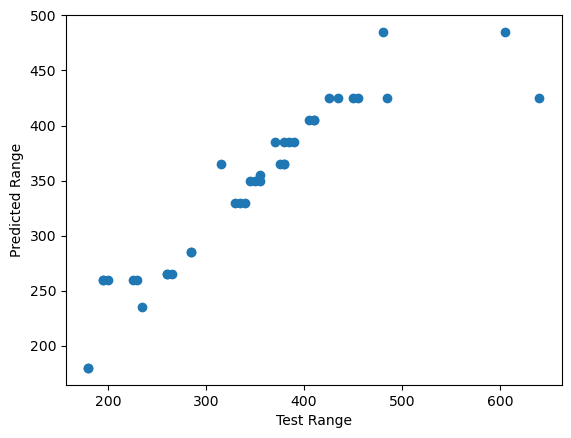

In [102]:
mtp.scatter(y_test,pred10)
mtp.xlabel("Test Range")
mtp.ylabel("Predicted Range")
mtp.show()